<a href="https://colab.research.google.com/github/fl4izdn4g/colab-training/blob/main/covid19-sir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model SIR w akcji
Zastosowanie modelu SIR w praktyce

### $\frac{dS}{dt} = -\rho \beta IS $

### $\frac{dI}{dt} = \rho \beta IS - \gamma I$

### $\frac{dR}{dt} = \gamma I$

gdzie:

* $ \beta $ - współczynnik kontaktu (ile może zarażony zarazić)
* $ \gamma $ - $ \frac{1}{okresinfekcji} $
* $ \rho $ - współczynnik "social distancing" z przedziału <0; 1>
  * 0 - kompletny lockdown
  * 1 - bez ograniczeń


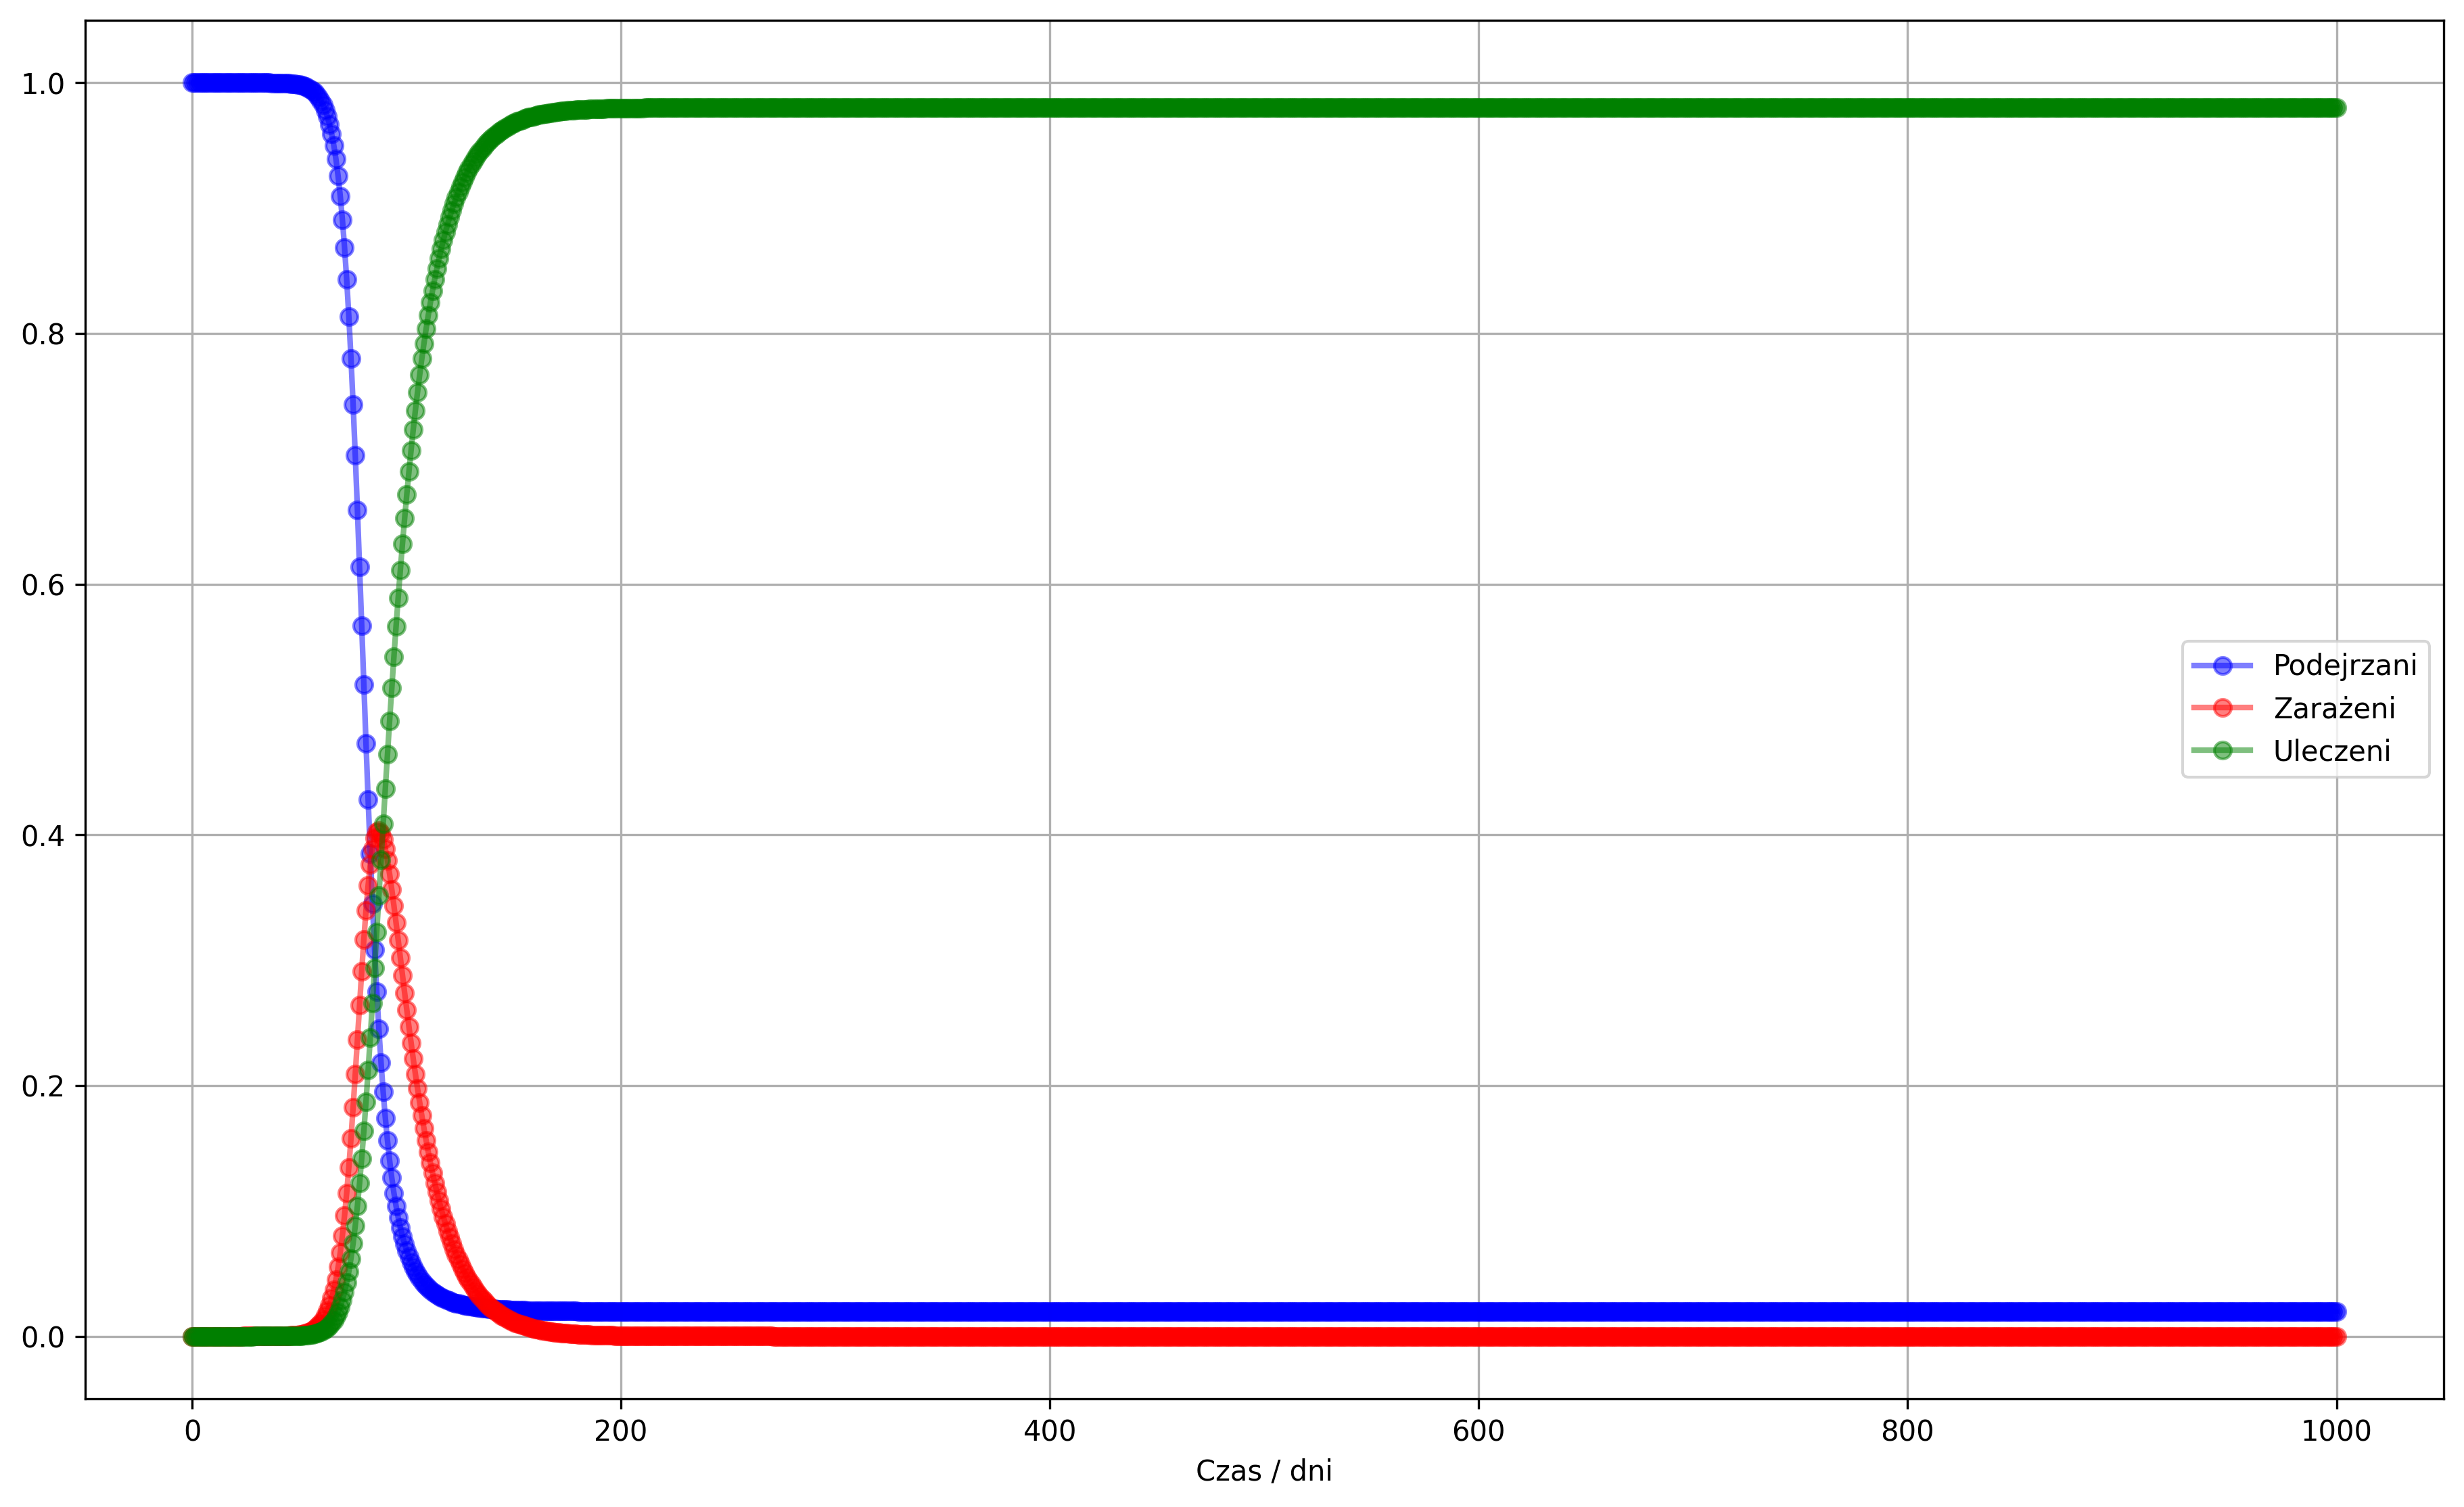

In [ ]:

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as ss

def sir_model(y, t, rho, beta, gamma):
    S, I, R = y
    dSdt = -rho*beta * S * I
    dIdt = rho*beta * S * I  - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

#@title Parametry wejściowe

#@markdown Jak długo epidemia (dni)
total_days =   1000#@param {type: "integer"}

#@markdown Populacja:
N =  38000000#@param {type:"integer"}

S0 = 1 - 1./N
I0 =  1./N
R0 = 0

#@markdown Współczynnik reprodukcji wirusa
r_not =  4#@param {type: "number"}
#@markdown Social distancing
rho =  1#@param {type: "number"}

#@markdown Okres infekcji
infection_period =  14#@param {type: "integer"}
gamma = 1./(infection_period)
beta = r_not * gamma

# czas (punkty w godzinach)
t = np.linspace(0, total_days, total_days)

# wartości początkowe
y0 = S0, I0, R0

# rozwiązanie układu równań.
ret = odeint(sir_model, y0, t, args=(rho, beta, gamma))
S, I, R = ret.T

# wykres
fig = plt.figure(facecolor='w', figsize=(15,9), dpi=300)
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, marker='o', label='Podejrzani')
ax.plot(t, I, 'r', alpha=0.5, lw=2, marker='o', label='Zarażeni')
ax.plot(t, R, 'g', alpha=0.5, lw=2, marker='o', label='Uleczeni')
ax.set_xlabel('Czas / dni')
ax.grid()
ax.legend(loc='best')
plt.show()


